# Introduction

<font color=gray size=3><b>Impact of Pruritus on sleep disturbances in Psoriasis patients

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
dataset = pd.read_csv('masterchart.csv')
print(f"{dataset.shape=}")
dataset.head()

dataset.shape=(100, 13)


,Age,Gender,Marital Status,Occupation,Duration,Type,Nail Changes,Joint Pain,DM,HTN,PASI,PSQI,PSS
0,18,Male,Unmarried,Student,3,Guttate,0,0,0,0,5,7,13
1,34,Male,Married,Driver,48,Chronic Plaque,1,0,0,0,14,9,9
2,19,Female,Unmarried,Student,24,Chronic Plaque,0,0,0,0,7,5,4
3,37,Female,Married,Homemaker,120,Chronic Plaque,1,0,1,0,4,5,8
4,27,Male,Unmarried,Professional,60,Chronic Plaque,1,1,0,0,8,8,15


# Statistical Analysis

## Age Group

In [3]:
def assign_age_group(age: int) -> str:
    """assigns and returns applicable age group"""
    if age <=30:
        return '18 - 30'
    elif age <= 40:
        return '31 - 40'
    elif age <= 50:
        return '41 - 50'
    elif age <= 60:
        return '51 - 60'
    elif age <=70:
        return '61 - 70'
    elif age <= 80:
        return '71 - 80'
    else:
        return '81 - 100'

In [4]:
dataset['Age Group'] = dataset['Age'].apply(assign_age_group)

In [5]:
dataset['Age Group'].value_counts().to_frame().sort_index()

,count
Age Group,
18 - 30,29
31 - 40,19
41 - 50,23
51 - 60,12
61 - 70,11
71 - 80,6


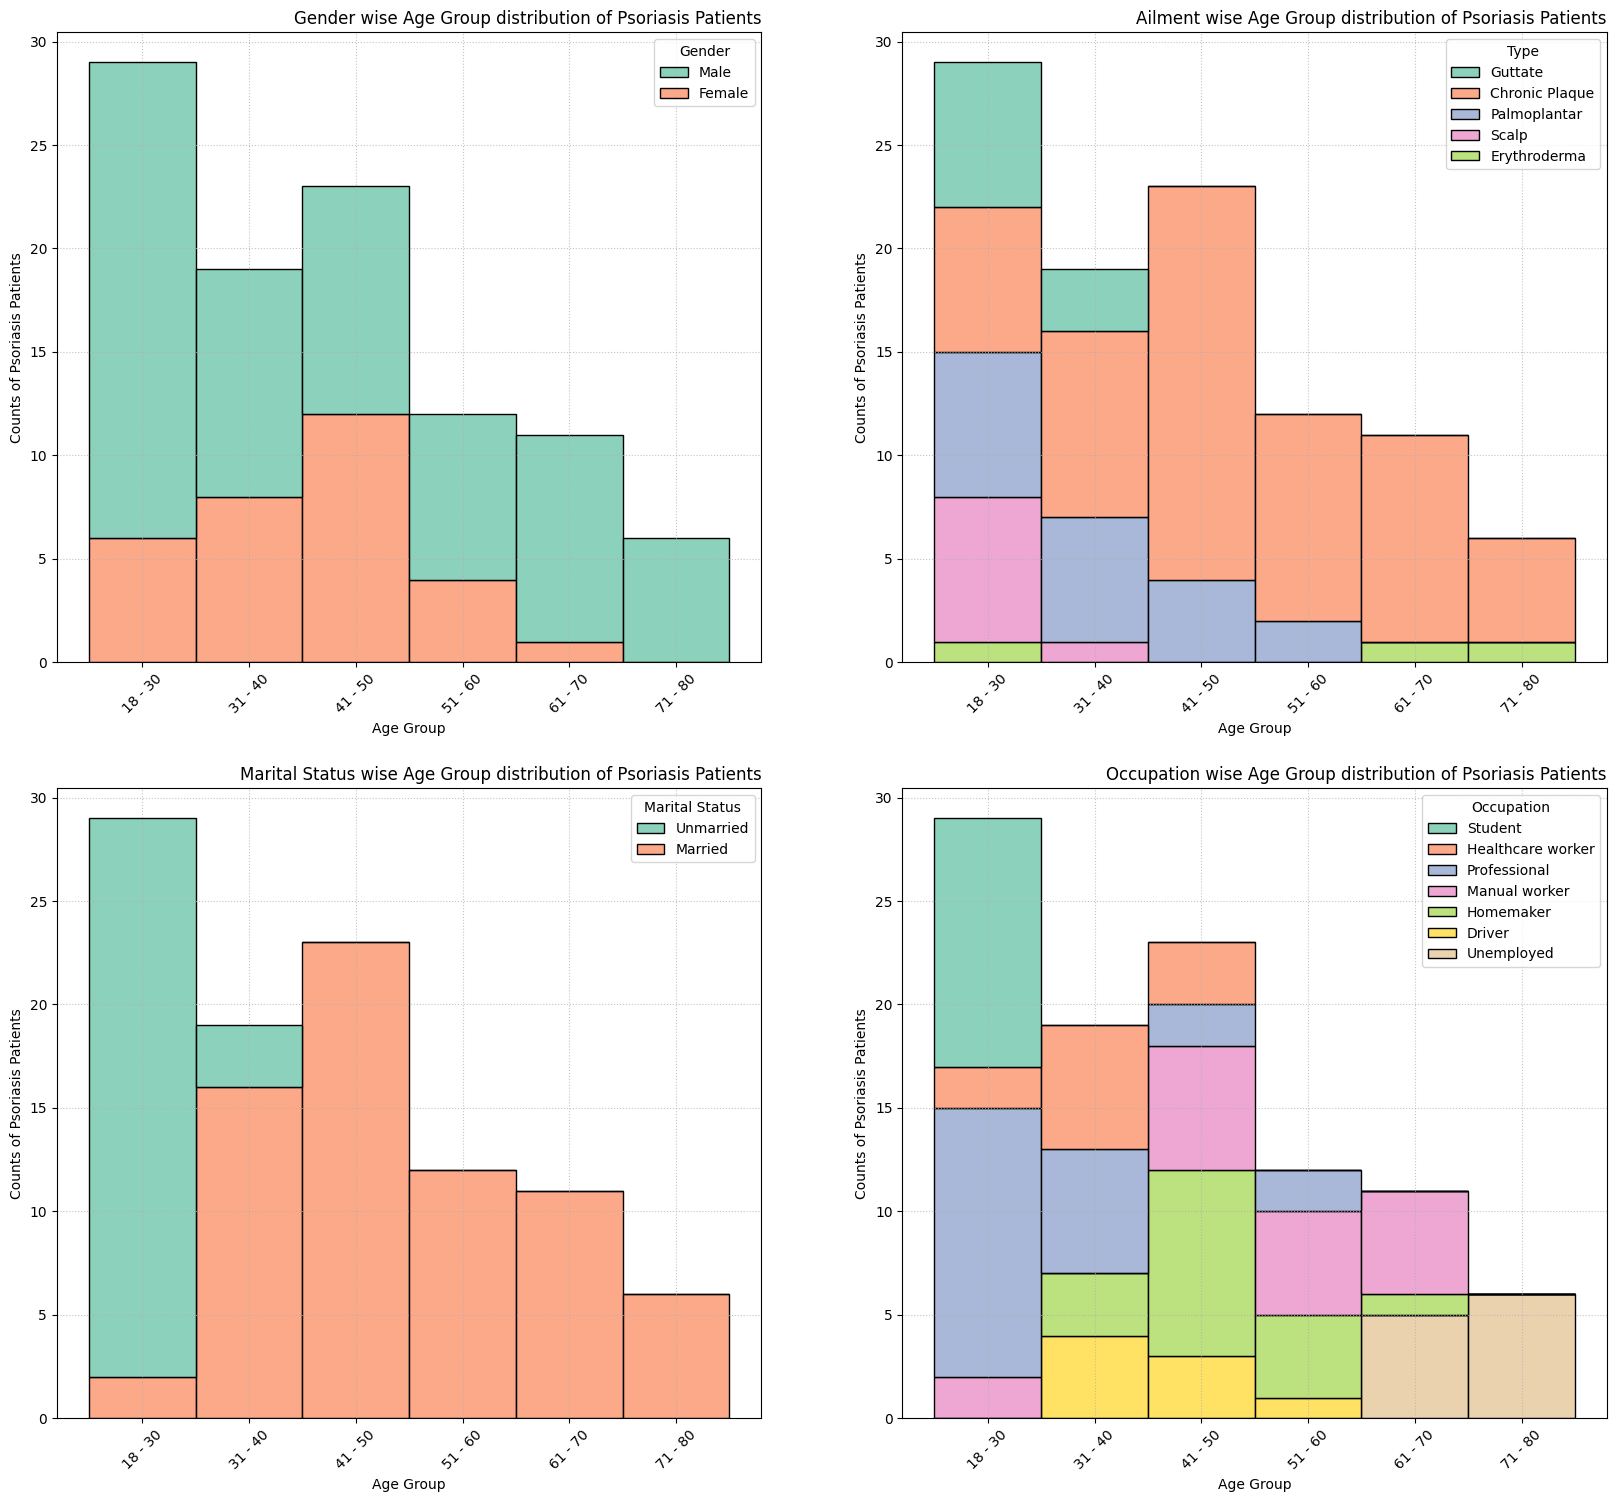

In [6]:
plt.figure(figsize=(20, 18))

ax1 = plt.subplot(221)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Gender', multiple='stack', palette='Set2', ax=ax1)
plt.title("Gender wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax2 = plt.subplot(222)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Type', multiple='stack', palette='Set2', ax=ax2)
plt.title("Ailment wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax3 = plt.subplot(223)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Marital Status', multiple='stack', palette='Set2', ax=ax3)
plt.title("Marital Status wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax4 = plt.subplot(224)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Occupation', multiple='stack', palette='Set2', ax=ax4)
plt.title("Occupation wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

plt.show()

## Gender

In [7]:
gender_counts = dataset.Gender.value_counts().to_frame()

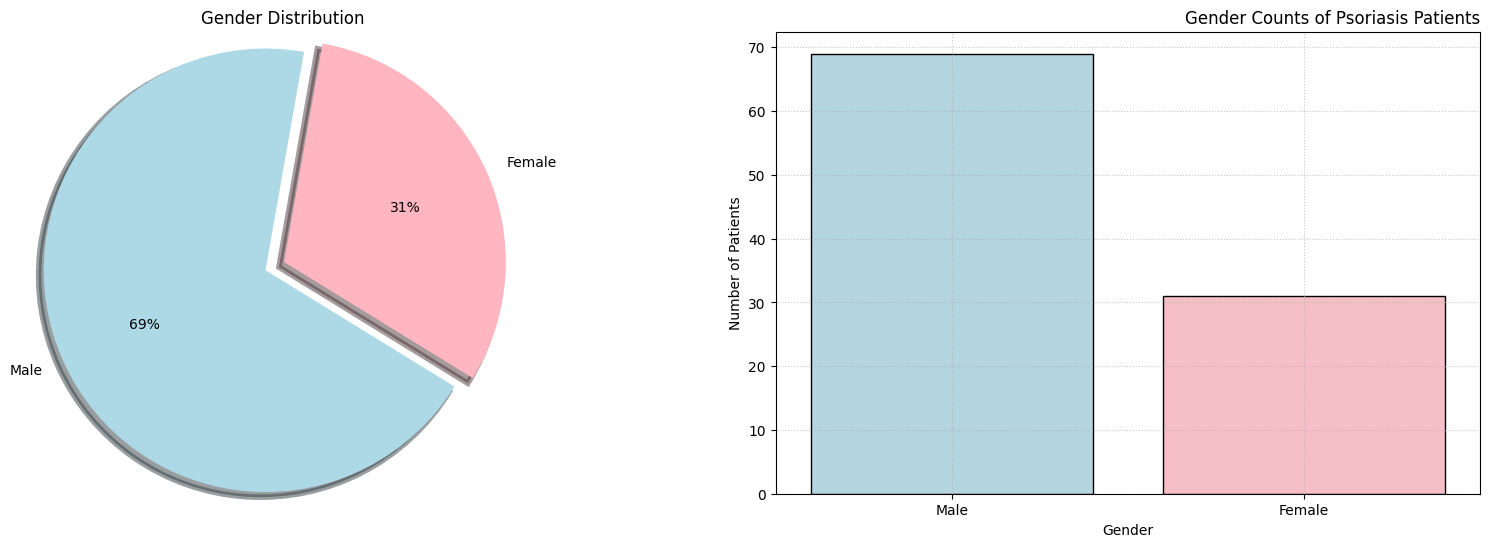

In [8]:
plt.figure(figsize=(20,6))

ax1 = plt.subplot(121)
ax1.set_aspect('equal')
plt.pie(gender_counts['count'], labels=gender_counts.index, autopct='%.0f%%', shadow=True, startangle=80, radius=1.2, colors=['lightblue', 'lightpink'], wedgeprops = {'linewidth': 4}, explode=[0.1, 0.01])
plt.title("Gender Distribution")

ax2 = plt.subplot(122)
sns.countplot(data=dataset, x='Gender', hue='Gender', palette=['lightblue', 'lightpink'], ax=ax2, edgecolor='black')
plt.grid(alpha=0.7, linestyle=':')
plt.ylabel("Number of Patients")
plt.title("Gender Counts of Psoriasis Patients", loc='right')

plt.show()

## Marital Status

In [9]:
marital_status_counts = dataset['Marital Status'].value_counts().to_frame()

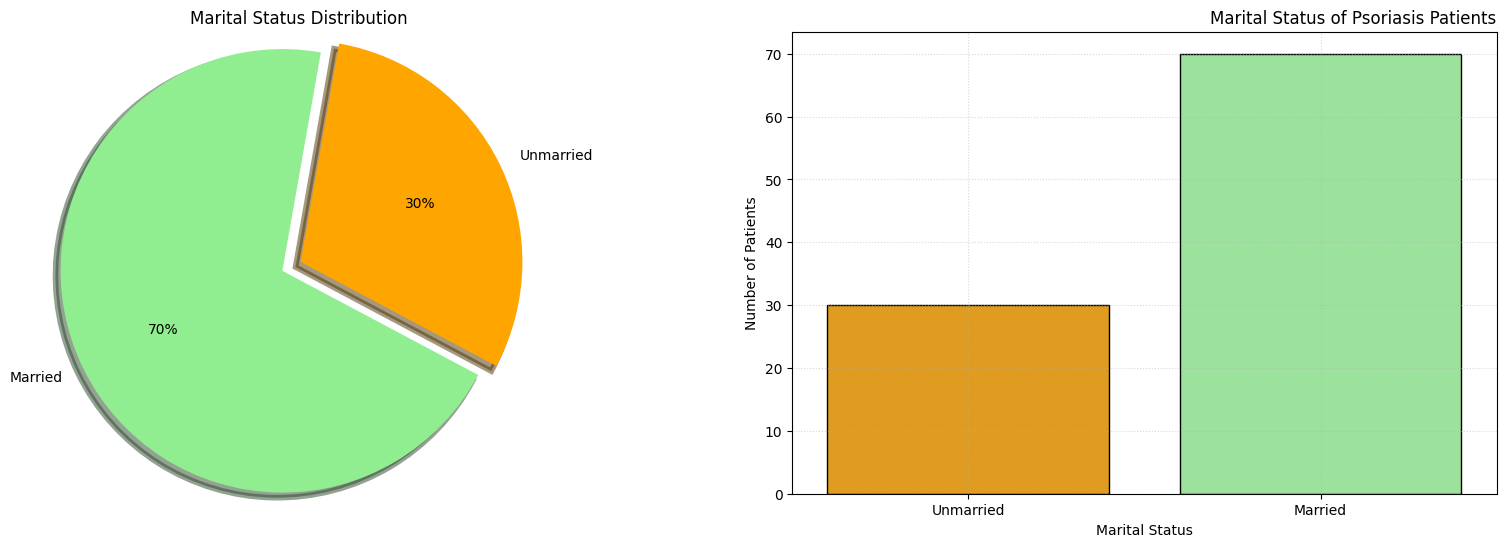

In [10]:
plt.figure(figsize=(20,6))

ax1 = plt.subplot(121)
ax1.set_aspect('equal')
plt.pie(marital_status_counts['count'], labels=marital_status_counts.index, autopct='%.0f%%', shadow=True, startangle=80, radius=1.2, colors=['lightgreen', 'orange'], wedgeprops = {'linewidth': 4}, explode=[0.1, 0.01])
plt.title("Marital Status Distribution")

ax2 = plt.subplot(122)
sns.countplot(data=dataset, x='Marital Status', hue='Marital Status', palette=['orange', 'lightgreen'], ax=ax2, edgecolor='black')
plt.grid(alpha=0.5, linestyle=':')
plt.ylabel("Number of Patients")
plt.title("Marital Status of Psoriasis Patients", loc='right')

plt.show()

## Occupation

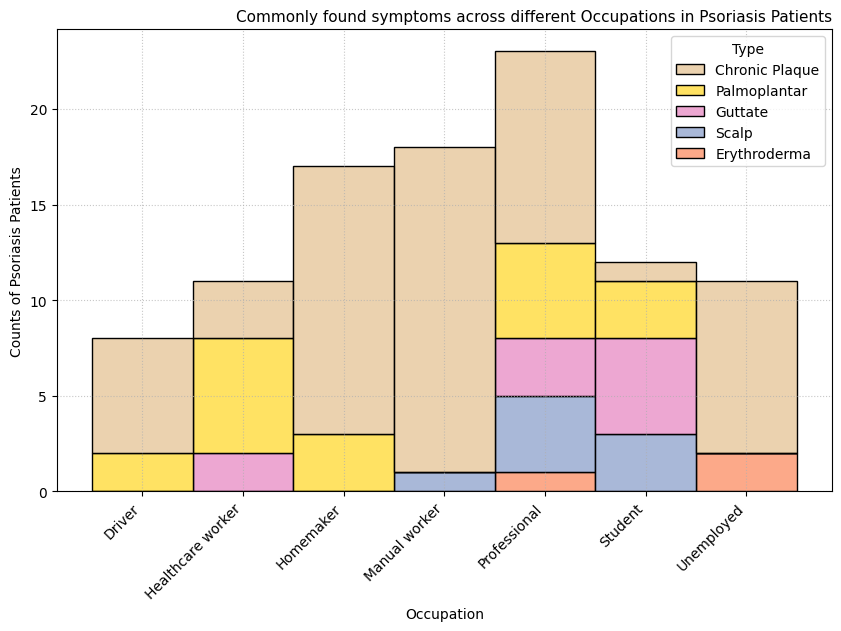

In [11]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(111)
sns.histplot(data=dataset.sort_values('Occupation'), x='Occupation', hue='Type', multiple='stack', palette='Set2_r', ax=ax1)
plt.title("Commonly found symptoms across different Occupations in Psoriasis Patients", loc='right', fontdict={'size': 11})
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.7, linestyle=':')
plt.xticks(rotation=45, ha='right')

plt.show()

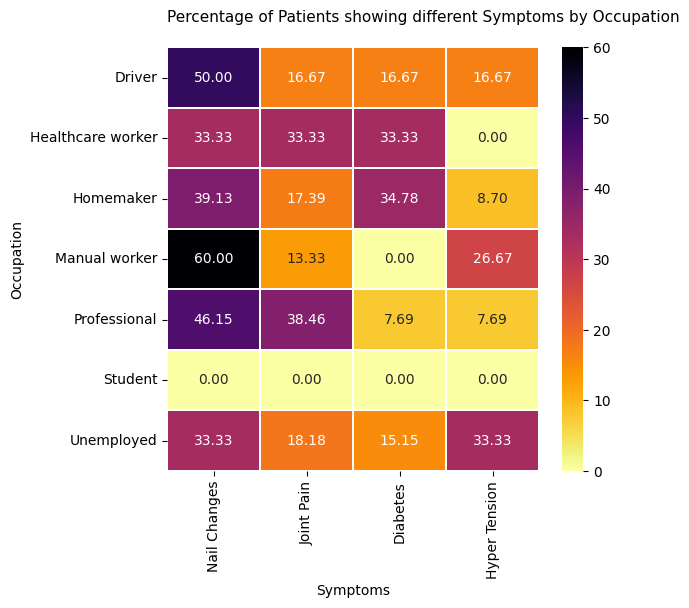

In [12]:
symptoms = dataset[['Occupation', 'Nail Changes', 'Joint Pain', 'DM', 'HTN']].rename(columns={'DM': 'Diabetes', 'HTN': 'Hyper Tension'})
grouped_counts = symptoms.groupby('Occupation').agg('sum')
grouped_counts_norm = grouped_counts.apply(lambda row: round(row*100/row.sum(), 2), axis='columns').fillna(0)

plt.figure(figsize=(6, 5.5))
ax1 = plt.subplot(111)
sns.heatmap(grouped_counts_norm, annot=True, fmt='.2f', linewidths=0.1, cmap='inferno_r', ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('Symptoms')
plt.title('Percentage of Patients showing different Symptoms by Occupation\n', loc='left', fontdict={'size': 11})
plt.show()

## Duration

In [13]:
dataset.head()

,Age,Gender,Marital Status,Occupation,Duration,Type,Nail Changes,Joint Pain,DM,HTN,PASI,PSQI,PSS,Age Group
0,18,Male,Unmarried,Student,3,Guttate,0,0,0,0,5,7,13,18 - 30
1,34,Male,Married,Driver,48,Chronic Plaque,1,0,0,0,14,9,9,31 - 40
2,19,Female,Unmarried,Student,24,Chronic Plaque,0,0,0,0,7,5,4,18 - 30
3,37,Female,Married,Homemaker,120,Chronic Plaque,1,0,1,0,4,5,8,31 - 40
4,27,Male,Unmarried,Professional,60,Chronic Plaque,1,1,0,0,8,8,15,18 - 30


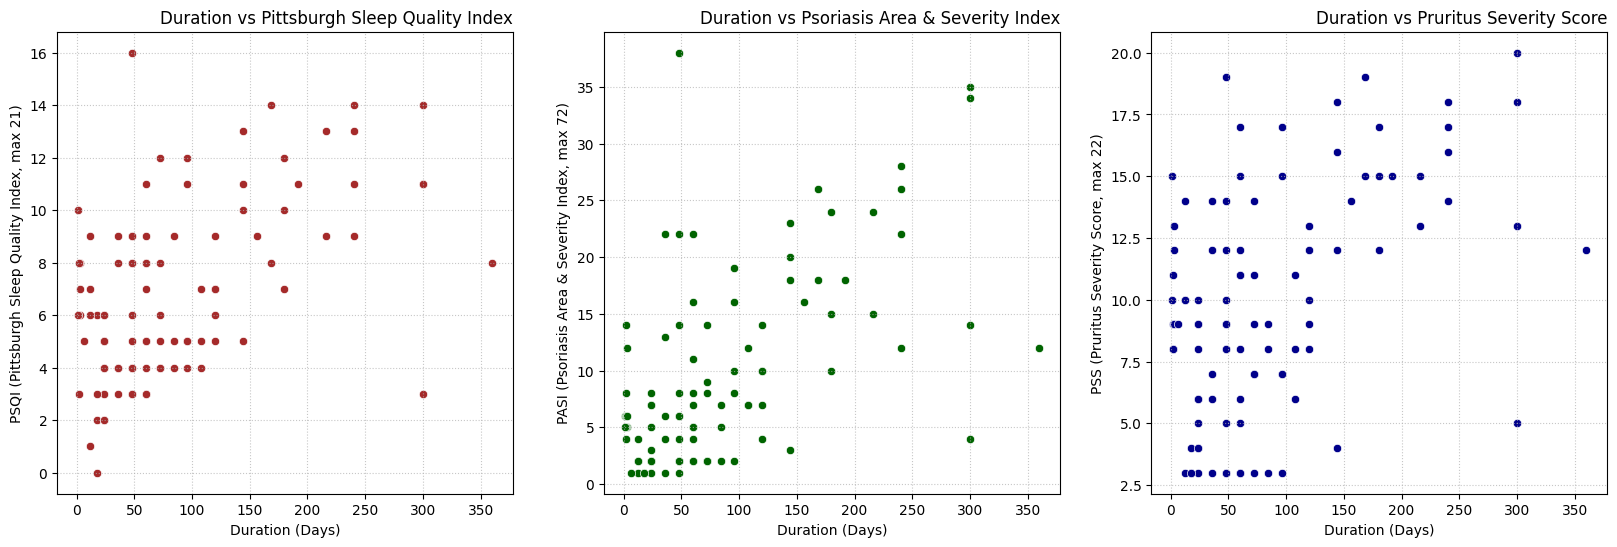

In [14]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(131)
sns.scatterplot(data=dataset, x='Duration', y='PSQI', ax=ax1, c='brown')
plt.title('Duration vs Pittsburgh Sleep Quality Index', loc='right')
plt.ylabel('PSQI (Pittsburgh Sleep Quality Index, max 21)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Days)')

ax2 = plt.subplot(132)
sns.scatterplot(data=dataset, x='Duration', y='PASI', ax=ax2, c='darkgreen')
plt.title('Duration vs Psoriasis Area & Severity Index', loc='right')
plt.ylabel('PASI (Psoriasis Area & Severity Index, max 72)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Days)')

ax3 = plt.subplot(133)
sns.scatterplot(data=dataset, x='Duration', y='PSS', ax=ax3, c='darkblue')
plt.title('Duration vs Pruritus Severity Score', loc='right')
plt.ylabel('PSS (Pruritus Severity Score, max 22)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Days)')

plt.show()

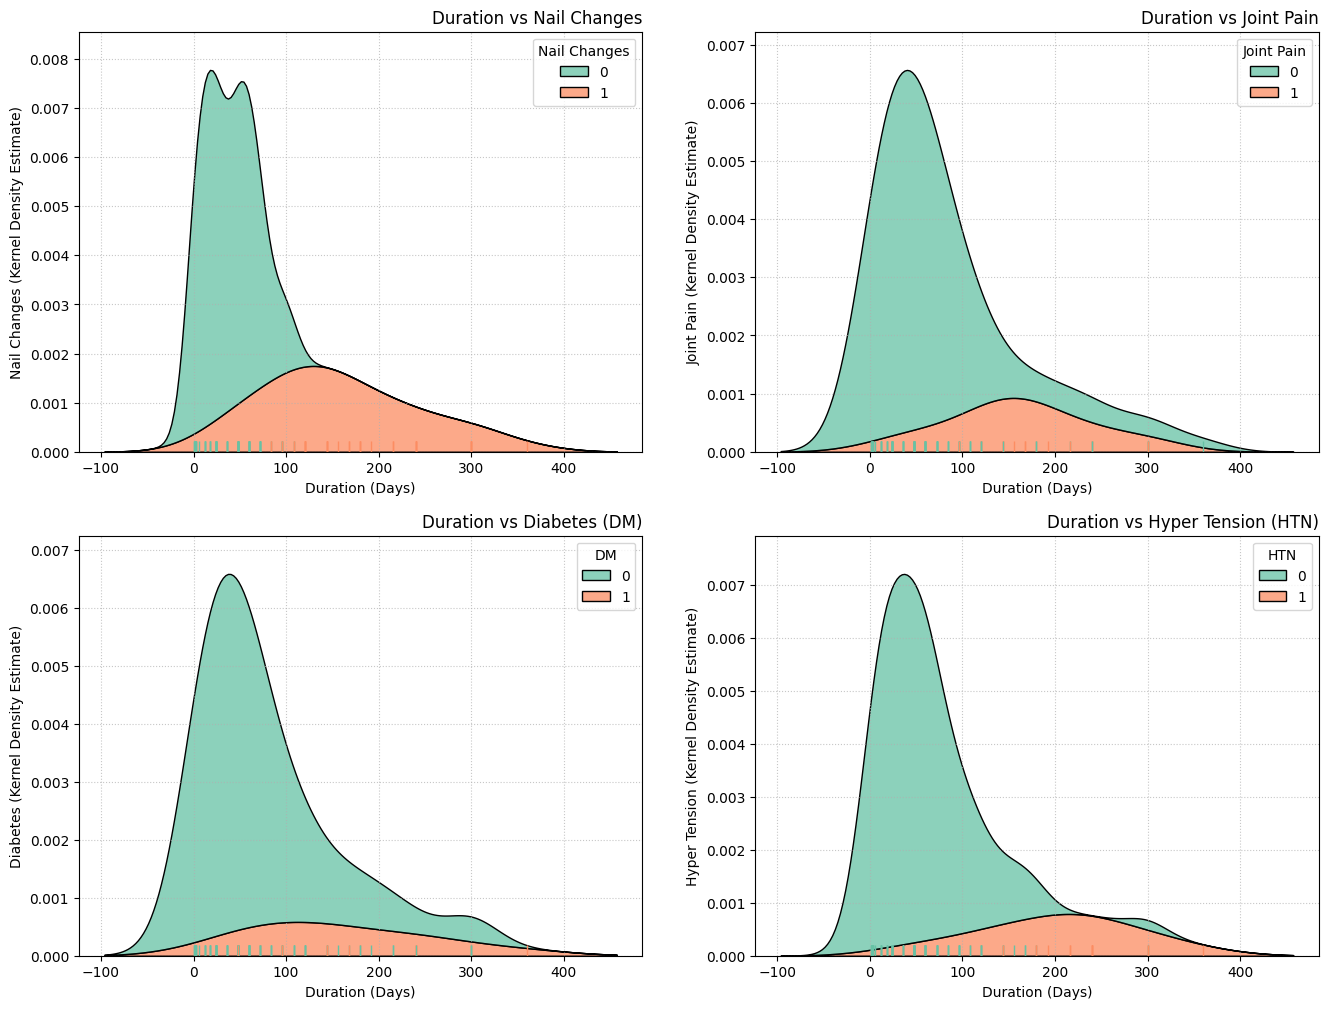

In [16]:
plt.figure(figsize=(16, 12))

ax1 = plt.subplot(221)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='Nail Changes', multiple='stack', palette='Set2', ax=ax1)
sns.rugplot(data=dataset, x='Duration', hue='Nail Changes', palette='Set2', legend=False, ax=ax1)
plt.title('Duration vs Nail Changes', loc='right')
plt.ylabel('Nail Changes (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax2 = plt.subplot(222)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='Joint Pain', multiple='stack', palette='Set2', ax=ax2)
sns.rugplot(data=dataset, x='Duration', hue='Joint Pain', palette='Set2', legend=False, ax=ax2)
plt.title('Duration vs Joint Pain', loc='right')
plt.ylabel('Joint Pain (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax3 = plt.subplot(223)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='DM', multiple='stack', palette='Set2', ax=ax3)
sns.rugplot(data=dataset, x='Duration', hue='DM', palette='Set2', legend=False, ax=ax3)
plt.title('Duration vs Diabetes (DM)', loc='right')
plt.ylabel('Diabetes (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax4 = plt.subplot(224)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='HTN', multiple='stack', palette='Set2', ax=ax4)
sns.rugplot(data=dataset, x='Duration', hue='HTN', palette='Set2', legend=False, ax=ax4)
plt.title('Duration vs Hyper Tension (HTN)', loc='right')
plt.ylabel('Hyper Tension (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

plt.show()

## Type

In [17]:
dataset.head()

,Age,Gender,Marital Status,Occupation,Duration,Type,Nail Changes,Joint Pain,DM,HTN,PASI,PSQI,PSS,Age Group
0,18,Male,Unmarried,Student,3,Guttate,0,0,0,0,5,7,13,18 - 30
1,34,Male,Married,Driver,48,Chronic Plaque,1,0,0,0,14,9,9,31 - 40
2,19,Female,Unmarried,Student,24,Chronic Plaque,0,0,0,0,7,5,4,18 - 30
3,37,Female,Married,Homemaker,120,Chronic Plaque,1,0,1,0,4,5,8,31 - 40
4,27,Male,Unmarried,Professional,60,Chronic Plaque,1,1,0,0,8,8,15,18 - 30
